In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
def read_log(fname):
    file = open(fname, 'r')
    x = []
    accuracy = []
    next(file)
    for line in file.readlines():
        it, current, target, prediction, correct = line.replace('\n','').split(',')
        x.append(int(it))
        accuracy.append(int(correct))
    return x, accuracy

In [3]:
def moving_average(a, n):
    moving_average = []
    for i in range(len(a)):
        start = max(0, i - n)
        values = a[start:i+1]
        moving_average.append(np.sum(values) / float(len(values)))
    return np.array(moving_average)

In [4]:
logs = [i for i in os.listdir('.') if '.log' in i]

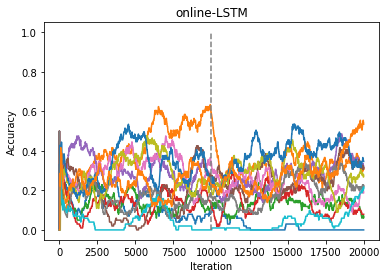

In [5]:
for log in logs:
    x, acc = read_log(log)
    moving = moving_average(acc, min(len(acc), 100))
    plt.plot(x, moving, label='online-LSTM')
plt.plot([10000, 10000], [0, 1], linestyle='--', color='gray')
#plt.legend()
plt.title('online-LSTM')
plt.ylabel('Accuracy')
plt.xlabel('Iteration')
plt.savefig('output.png', dpi=100)
plt.show()